In [ ]:
import numpy as np 
import pandas as pd 

from datetime import date, timedelta, datetime 

import matplotlib.pyplot as plt 
import matplotlib.dates as mdates 

from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error 
from keras.models import Sequential
from keras.layers import GRU, LSTM, Dense, Dropout, Bidirectional
from keras.callbacks import EarlyStopping 
from sklearn.preprocessing import RobustScaler, MinMaxScaler 

import seaborn as sns

sns.set_style('whitegrid')
plt.style.use('seaborn-darkgrid')

### Covid data:

In [ ]:
url = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv'

covid_raw = pd.read_csv(url, sep = ',')
covid_raw.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [ ]:
covid_new = covid_raw[['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases']]

covid_new = covid_new.fillna(0) # fill NaN values as zeros
covid_new[['total_cases', 'new_cases']] = covid_new[['total_cases', 'new_cases']].astype(int) # converting to int

### Russia:

In [ ]:
# Extracting Russia:
df_Russia = covid_new[covid_new['iso_code'].isin(['RUS'])]
df_Russia.index = np.arange(0, len(df_Russia)) # new indexing
df_Russia['ma_cases'] = df_Russia['new_cases'].transform(lambda x: x.rolling(window = 7, min_periods = 1, center = False).mean())
df_Russia['date'] = pd.to_datetime(df_Russia['date'])
df_Russia

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,iso_code,continent,location,date,total_cases,new_cases,ma_cases
0,RUS,Europe,Russia,2020-01-31,2,2,2.000000
1,RUS,Europe,Russia,2020-02-01,2,0,1.000000
2,RUS,Europe,Russia,2020-02-02,2,0,0.666667
3,RUS,Europe,Russia,2020-02-03,2,0,0.500000
4,RUS,Europe,Russia,2020-02-04,2,0,0.400000
...,...,...,...,...,...,...,...
834,RUS,Europe,Russia,2022-05-14,17989065,4961,4656.142857
835,RUS,Europe,Russia,2022-05-15,17993952,4887,4587.857143
836,RUS,Europe,Russia,2022-05-16,17998438,4486,4523.571429
837,RUS,Europe,Russia,2022-05-17,18002493,4055,4469.428571


### Serbia:

In [ ]:
# Extracting Serbia:
df_Serbia = covid_new[covid_new['iso_code'].isin(['SRB'])]
df_Serbia.index = np.arange(0, len(df_Serbia)) # new indexing
df_Serbia['ma_cases'] = df_Serbia['new_cases'].transform(lambda x: x.rolling(window = 7, min_periods = 1, center = False).mean())
df_Serbia['date'] = pd.to_datetime(df_Serbia['date'])
df_Serbia

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,iso_code,continent,location,date,total_cases,new_cases,ma_cases
0,SRB,Europe,Serbia,2020-02-26,0,0,0.000000
1,SRB,Europe,Serbia,2020-02-27,0,0,0.000000
2,SRB,Europe,Serbia,2020-02-28,0,0,0.000000
3,SRB,Europe,Serbia,2020-02-29,0,0,0.000000
4,SRB,Europe,Serbia,2020-03-01,0,0,0.000000
...,...,...,...,...,...,...,...
808,SRB,Europe,Serbia,2022-05-14,2012597,327,417.142857
809,SRB,Europe,Serbia,2022-05-15,2012836,239,408.142857
810,SRB,Europe,Serbia,2022-05-16,2013240,404,392.142857
811,SRB,Europe,Serbia,2022-05-17,2013622,382,446.714286


### Sweden:

In [ ]:
# Extracting Sweden:
df_Sweden = covid_new[covid_new['iso_code'].isin(['SWE'])]
df_Sweden.index = np.arange(0, len(df_Sweden)) # new indexing
df_Sweden['ma_cases'] = df_Sweden['new_cases'].transform(lambda x: x.rolling(window = 7, min_periods = 1, center = False).mean())
df_Sweden['date'] = pd.to_datetime(df_Sweden['date'])
df_Sweden

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,iso_code,continent,location,date,total_cases,new_cases,ma_cases
0,SWE,Europe,Sweden,2020-02-01,1,1,1.000000
1,SWE,Europe,Sweden,2020-02-02,1,0,0.500000
2,SWE,Europe,Sweden,2020-02-03,1,0,0.333333
3,SWE,Europe,Sweden,2020-02-04,1,0,0.250000
4,SWE,Europe,Sweden,2020-02-05,1,0,0.200000
...,...,...,...,...,...,...,...
833,SWE,Europe,Sweden,2022-05-14,2504894,0,257.714286
834,SWE,Europe,Sweden,2022-05-15,2504894,0,257.714286
835,SWE,Europe,Sweden,2022-05-16,2504894,0,257.714286
836,SWE,Europe,Sweden,2022-05-17,2504894,0,257.714286


### Italy:

In [ ]:
# Extracting Italy:
df_Italy = covid_new[covid_new['iso_code'].isin(['ITA'])]
df_Italy.index = np.arange(0, len(df_Italy)) # new indexing
df_Italy['ma_cases'] = df_Italy['new_cases'].transform(lambda x: x.rolling(window = 7, min_periods = 1, center = False).mean())
df_Italy['date'] = pd.to_datetime(df_Italy['date'])
df_Italy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,iso_code,continent,location,date,total_cases,new_cases,ma_cases
0,ITA,Europe,Italy,2020-01-31,2,2,2.000000
1,ITA,Europe,Italy,2020-02-01,2,0,1.000000
2,ITA,Europe,Italy,2020-02-02,2,0,0.666667
3,ITA,Europe,Italy,2020-02-03,2,0,0.500000
4,ITA,Europe,Italy,2020-02-04,2,0,0.400000
...,...,...,...,...,...,...,...
834,ITA,Europe,Italy,2022-05-14,17030147,36334,37482.000000
835,ITA,Europe,Italy,2022-05-15,17057873,27726,36982.142857
836,ITA,Europe,Italy,2022-05-16,17071649,13776,36461.428571
837,ITA,Europe,Italy,2022-05-17,17116550,44901,34847.428571


### Austria:

In [ ]:
# Extracting Austria:
df_Austria = covid_new[covid_new['iso_code'].isin(['AUT'])]
df_Austria.index = np.arange(0, len(df_Austria)) # new indexing
df_Austria['ma_cases'] = df_Austria['new_cases'].transform(lambda x: x.rolling(window = 7, min_periods = 1, center = False).mean())
df_Austria['date'] = pd.to_datetime(df_Austria['date'])
df_Austria

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,iso_code,continent,location,date,total_cases,new_cases,ma_cases
0,AUT,Europe,Austria,2020-02-25,2,2,2.000000
1,AUT,Europe,Austria,2020-02-26,1,0,1.000000
2,AUT,Europe,Austria,2020-02-27,1,0,0.666667
3,AUT,Europe,Austria,2020-02-28,1,0,0.500000
4,AUT,Europe,Austria,2020-02-29,3,2,0.800000
...,...,...,...,...,...,...,...
809,AUT,Europe,Austria,2022-05-14,4246432,4963,4687.285714
810,AUT,Europe,Austria,2022-05-15,4250291,3859,4500.857143
811,AUT,Europe,Austria,2022-05-16,4253741,3450,4490.714286
812,AUT,Europe,Austria,2022-05-17,4255897,2156,4233.428571


### Preprocessing data:

In [ ]:
df_Russia = df_Russia[df_Russia['ma_cases'] != 0]
df_Russia.index = np.arange(0, len(df_Russia))

In [ ]:
df_Serbia = df_Serbia[df_Serbia['ma_cases'] != 0]
df_Serbia.index = np.arange(0, len(df_Serbia))

In [ ]:
df_Sweden = df_Sweden[df_Sweden['ma_cases'] != 0]
df_Sweden.index = np.arange(0, len(df_Sweden))

In [ ]:
df_Italy = df_Italy[df_Italy['ma_cases'] != 0]
df_Italy.index = np.arange(0, len(df_Italy))

In [ ]:
df_Austria = df_Austria[df_Austria['ma_cases'] != 0]
df_Austria.index = np.arange(0, len(df_Austria))

In [ ]:
df = df_Russia # repeated this step for all datasets

In [ ]:
# Create a new dataframe with only the 'ma_cases' column 
data = df.filter(['ma_cases'])
# Convert the dataframe to a numpy array
dataset = data.values

# # Get the number of rows to train the model on
training_data_len = int(np.ceil(len(dataset) * 0.8))

test_data_end = len(dataset)

In [ ]:
# Scale the data
scaler = MinMaxScaler(feature_range = (0, 1))
scaled_data = scaler.fit_transform(dataset)

# scaled_data

In [ ]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0 : int(training_data_len), :]

# Split the data into x_train and y_train data sets
x_train = []
y_train = []

# Since LSTMs store long term memory state, we create a data structure with 14 timesteps and 1 output:
# So for each element of training set, we have 14 previous training set elements 
for i in range(14, len(train_data)):
    x_train.append(train_data[i - 14 : i, 0])
    y_train.append(train_data[i, 0])
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

In [ ]:
# Create the testing data set
# Create a new array containing scaled values 
test_data = scaled_data[training_data_len - 14: test_data_end, :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len : test_data_end, :]
for i in range(14, len(test_data)):
    x_test.append(test_data[i - 14 : i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

## Neural networks:

These are just some neural networks that during the process of modeling gave the best results. In the table in the thesis can be seen best results for each of the architecture.

### LSTM v1:

In [ ]:
# Build the LSTM model - two LSTM layers and two dense layers - output one value since it is a timeseries
model = Sequential()
model.add(LSTM(128, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences = False))
model.add(Dense(16))
model.add(Dense(1))

# Compile the model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Train the model
epochs = 100
batch_size = 1
early_stop = EarlyStopping(monitor = 'loss', patience = 5, verbose = 1)
history = model.fit(x_train, y_train, 
                    batch_size = batch_size, 
                    epochs = epochs,
                    validation_data = (x_test, y_test))

In [ ]:
# Get the models predicted values 
predictions = model.predict(x_test)

# Unscale data:
predictions = scaler.inverse_transform(predictions)
# y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
print('RMSE:', rmse)

# Get the mean squared error (MSE)
mse = np.mean(((predictions - y_test) ** 2))
print('MSE:', mse)

# Get the mean absolute error (MAE)
mae = np.mean(np.abs((y_test - predictions)))
print('MAE: ', mae)

# Get the mean absolute percentage error (MAPE)
mape = np.mean((np.abs(y_test - predictions)/ y_test)) * 100
print('MAPE: ', mape)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


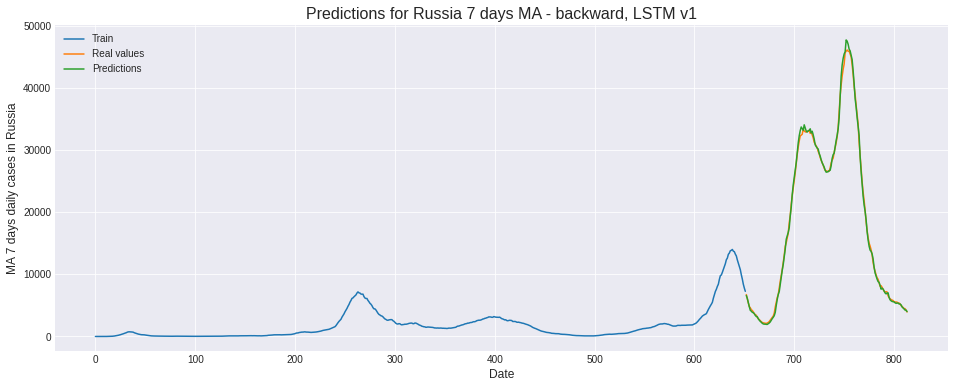

In [ ]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len : test_data_end]
valid['predictions'] = predictions

# Visualize the data
plt.figure(figsize = (16,6))

plt.plot(train['ma_cases'])
plt.plot(valid[['ma_cases', 'predictions']])

plt.title('Predictions for Russia 7 days MA - backward, LSTM v1', fontsize = 16)
plt.xlabel('Date', fontsize = 12)
plt.ylabel('MA 7 days daily cases in Russia', fontsize = 12)
plt.legend(['Train', 'Real values', 'Predictions'], loc = 'upper left')

plt.show()

### LSTM v2:

In [ ]:
# Build the LSTM model - three LSTM layers and three dense layers - output one value since it is a timeseries
model = Sequential()
model.add(LSTM(256, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(128, return_sequences = True))
model.add(LSTM(64, return_sequences = False))
model.add(Dense(32))
model.add(Dense(16))
model.add(Dense(1))

# Compile the model
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mean_squared_error', 'mean_absolute_error', 'mean_absolute_percentage_error'])

# Train the model
epochs = 100
batch_size = 1
early_stop = EarlyStopping(monitor = 'loss', patience = 5, verbose = 1)
history = model.fit(x_train, y_train, 
                    batch_size = batch_size, 
                    epochs = epochs,
                    validation_data = (x_test, y_test))

In [ ]:
# Get the models predicted values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
print('RMSE:', rmse)

# Get the mean squared error (MSE)
mse = np.mean(((predictions - y_test) ** 2))
print('MSE:', mse)

# Get the mean absolute error (MAE)
mae = np.mean(np.abs((y_test - predictions)))
print('MAE: ', mae)

# Get the mean absolute percentage error (MAPE)
mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100
print('MAPE: ', mape)

### LSTM v3:

In [ ]:
# Build the LSTM model - two bidirectional LSTM layers and three dense layers - output one value since it is a timeseries
model = Sequential()
model.add(Bidirectional(LSTM(128, return_sequences = True, input_shape = (x_train.shape[1], 1))))
model.add(Bidirectional(LSTM(64, return_sequences = False)))
model.add(Dense(32))
model.add(Dense(16))
model.add(Dense(1))

# Compile the model
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mean_squared_error', 'mean_absolute_error', 'mean_absolute_percentage_error'])

# Train the model
epochs = 100
batch_size = 1
early_stop = EarlyStopping(monitor = 'loss', patience = 5, verbose = 1)
history = model.fit(x_train, y_train, 
                    batch_size = batch_size, 
                    epochs = epochs,
                    validation_data = (x_test, y_test))

In [ ]:
# Get the models predicted values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
print('RMSE:', rmse)

# Get the mean squared error (MSE)
mse = np.mean(((predictions - y_test) ** 2))
print('MSE:', mse)

# Get the mean absolute error (MAE)
mae = np.mean(np.abs((y_test - predictions)))
print('MAE: ', mae)

# Get the mean absolute percentage error (MAPE)
mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100
print('MAPE: ', mape)

### LSTM v4:

In [ ]:
# Build the LSTM model - three bidirectional LSTM layers and three dense layers - output one value since it is a timeseries
model = Sequential()
model.add(Bidirectional(LSTM(256, return_sequences = True, input_shape = (x_train.shape[1], 1))))
model.add(Bidirectional(LSTM(128, return_sequences = True)))
model.add(Bidirectional(LSTM(64, return_sequences = False)))
model.add(Dense(32))
model.add(Dense(16))
model.add(Dense(1))

# Compile the model
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mean_squared_error', 'mean_absolute_error', 'mean_absolute_percentage_error'])

# Train the model
epochs = 100
batch_size = 1
early_stop = EarlyStopping(monitor = 'loss', patience = 5, verbose = 1)
history = model.fit(x_train, y_train, 
                    batch_size = batch_size, 
                    epochs = epochs,
                    validation_data = (x_test, y_test))

In [ ]:
# Get the models predicted values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
print('RMSE:', rmse)

# Get the mean squared error (MSE)
mse = np.mean(((predictions - y_test) ** 2))
print('MSE:', mse)

# Get the mean absolute error (MAE)
mae = np.mean(np.abs((y_test - predictions)))
print('MAE: ', mae)

# Get the mean absolute percentage error (MAPE)
mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100
print('MAPE: ', mape)

### TCN v1:

In [ ]:
pip install keras-tcn

In [ ]:
from tcn import TCN

In [ ]:
# Build the TCN model - two TCN layers and three dense layers - output one value since it is a timeseries
model = Sequential()
model.add(TCN(128, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(TCN(64, return_sequences = False))
model.add(Dense(32))
model.add(Dense(16))
model.add(Dense(1))

# Compile the model
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mean_squared_error', 'mean_absolute_error', 'mean_absolute_percentage_error'])

# Train the model
epochs = 100
batch_size = 1
early_stop = EarlyStopping(monitor = 'loss', patience = 5, verbose = 1)
history = model.fit(x_train, y_train, 
                    batch_size = batch_size, 
                    epochs = epochs,
                    validation_data = (x_test, y_test))

In [ ]:
# Get the models predicted values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
print('RMSE:', rmse)

# Get the mean squared error (MSE)
mse = np.mean(((predictions - y_test) ** 2))
print('MSE:', mse)

# Get the mean absolute error (MAE)
mae = np.mean(np.abs((y_test - predictions)))
print('MAE: ', mae)

# Get the mean absolute percentage error (MAPE)
mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100
print('MAPE: ', mape)

### TCN v2:

In [ ]:
# Build the TCN model - three TCN layers and three dense layers - output one value since it is a timeseries
model = Sequential()
model.add(TCN(256, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(TCN(128, return_sequences = True))
model.add(TCN(64, return_sequences = False))
model.add(Dense(32))
model.add(Dense(16))
model.add(Dense(1))

# Compile the model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Train the model
epochs = 100
batch_size = 1
early_stop = EarlyStopping(monitor = 'loss', patience = 5, verbose = 1)
history = model.fit(x_train, y_train, 
                    batch_size = batch_size, 
                    epochs = epochs)

In [ ]:
# Get the models predicted values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
print('RMSE:', rmse)

# Get the mean squared error (MSE)
mse = np.mean(((predictions - y_test) ** 2))
print('MSE:', mse)

# Get the mean absolute error (MAE)
mae = np.mean(np.abs((y_test - predictions)))
print('MAE: ', mae)

# Get the mean absolute percentage error (MAPE)
mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100
print('MAPE: ', mape)

### GRU model v1

In [ ]:
# Build the GRU model - two GRU layers and two dense layers - output one value since it is a timeseries
model = Sequential()
model.add(GRU(128, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(GRU(64, return_sequences = False))
model.add(Dense(16))
model.add(Dense(1))

# Compile the model
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mean_squared_error', 'mean_absolute_error', 'mean_absolute_percentage_error'])

# Train the model
epochs = 100
batch_size = 1
early_stop = EarlyStopping(monitor = 'loss', patience = 5, verbose = 1)
history = model.fit(x_train, y_train, 
                    batch_size = batch_size, 
                    epochs = epochs,
                    validation_data = (x_test, y_test))

In [ ]:
# Get the models predicted values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
print('RMSE:', rmse)

# Get the mean squared error (MSE)
mse = np.mean(((predictions - y_test) ** 2))
print('MSE:', mse)

# Get the mean absolute error (MAE)
mae = np.mean(np.abs((y_test - predictions)))
print('MAE: ', mae)

# Get the mean absolute percentage error (MAPE)
mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100
print('MAPE: ', mape)

### GRU model v2

In [ ]:
# Build the GRU model - three GRU layers and three dense layers - output one value since it is a timeseries
model = Sequential()
model.add(GRU(256, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(GRU(128, return_sequences = True))
model.add(GRU(64, return_sequences = False))
model.add(Dense(32))
model.add(Dense(16))
model.add(Dense(1))

# Compile the model
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mean_squared_error', 'mean_absolute_error', 'mean_absolute_percentage_error'])

# Train the model
epochs = 50
batch_size = 1
early_stop = EarlyStopping(monitor = 'loss', patience = 5, verbose = 1)
history = model.fit(x_train, y_train, 
                    batch_size = batch_size, 
                    epochs = epochs,
                    validation_data = (x_test, y_test))

In [ ]:
# Get the models predicted values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
print('RMSE:', rmse)

# Get the mean squared error (MSE)
mse = np.mean(((predictions - y_test) ** 2))
print('MSE:', mse)

# Get the mean absolute error (MAE)
mae = np.mean(np.abs((y_test - predictions)))
print('MAE: ', mae)

# Get the mean absolute percentage error (MAPE)
mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100
print('MAPE: ', mape)